<center> <h1> Applied Data Science Assignment 1  </h1> </center>

<center> Nima Alizadeh </center>
<center> Tehran Institute of Advance Studies </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

Let's load the dataset and get some basic information:

In [2]:
dataset=pd.read_csv("tehran-renting.csv")

In [3]:
dataset.head()

,Unnamed: 0,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district
0,0,320.0,0.0,1.0,55,7,1,1,1,0,1.657961e+09,استاد معین,320.0,9
1,1,300.0,0.1,3.0,45,13,1,0,1,1,1.657961e+09,آذربایجان,303.0,10
2,2,300.0,30.0,2.0,128,9,3,1,1,1,1.657961e+09,محمودیه,1300.0,1
3,3,600.0,18.0,8.0,132,16,2,1,1,1,1.657961e+09,فرمانیه,1200.0,1
4,4,200.0,11.0,2.0,105,7,2,1,1,1,1.657961e+09,شهران شمالی,566.0,5


In [4]:
print("Dataset shape:", dataset.shape)
dataset.info()
dataset.describe()
dataset.describe(include='all')

Dataset shape: (165118, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165118 entries, 0 to 165117
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      165118 non-null  int64  
 1   deposit         165118 non-null  float64
 2   rent            165118 non-null  float64
 3   floor           165118 non-null  float64
 4   area            165118 non-null  int64  
 5   age             165118 non-null  int64  
 6   rooms           165118 non-null  int64  
 7   elavator        165118 non-null  int64  
 8   parking         165118 non-null  int64  
 9   Warehouse       165118 non-null  int64  
 10  time            165118 non-null  float64
 11  region          165118 non-null  object 
 12  all_to_deposit  165118 non-null  float64
 13  district        165118 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 17.6+ MB


,Unnamed: 0,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district
count,165118.000000,165118.000000,165118.000000,165118.000000,165118.000000,165118.000000,165118.000000,165118.000000,165118.000000,165118.000000,1.651180e+05,165118,1.651180e+05,165118.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,سعادت‌آباد,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14288,NaN,NaN
mean,82558.500000,701.107668,33.816576,3.175971,137.087440,9.846613,2.154895,0.763714,0.848569,0.890587,1.659729e+09,NaN,1.828111e+03,5.663441
std,47665.605211,1005.844810,736.248894,2.557925,2046.226244,6.978180,0.774918,0.424801,0.358470,0.312157,8.932099e+05,NaN,2.456616e+04,5.550199
min,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.657961e+09,NaN,1.000000e+00,1.000000
25%,41279.250000,250.000000,0.000000,2.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.658935e+09,NaN,4.900000e+02,2.000000
50%,82558.500000,480.000000,7.000000,3.000000,105.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.659683e+09,NaN,8.000000e+02,4.000000
75%,123837.750000,800.000000,18.000000,4.000000,140.000000,15.000000,3.000000,1.000000,1.000000,1.000000,1.660494e+09,NaN,1.366000e+03,7.000000


The dataset 13 main features (one column is redundant):
*   **`deposit`**: This represents the amount of money (in milion Tomans) paid as a security deposit for the rental property, typically a lump sum paid upfront.
*   **`rent`**: This is the monthly rental fee for the property (in milion Tomans).
*   **`floor`**: This indicates the floor number on which the property is located within a building.
*   **`area`**: This specifies the size of the property, likely in square meters.
*   **`age`**: This refers to the age of the building or property in years.
*   **`rooms`**: This denotes the number of rooms in the property.
*   **`elavator`**: This is a binary (or boolean) feature indicating whether the building has an elevator (1 for yes, 0 for no).
*   **`parking`**: This is a binary (or boolean) feature indicating whether the property includes parking facilities (1 for yes, 0 for no).
*   **`Warehouse`**: This is a binary (or boolean) feature indicating whether the property includes a warehouse or storage unit (1 for yes, 0 for no).
*   **`time`**: This is a timestamp, indicating when the rental listing was posted or updated. It contains date and time information.
*   **`region`**: This categorical feature specifies the geographical region or neighborhood where the property is located in Tehran.
*   **`all_to_deposit`**: This is a calculated or composite value representing the total initial payment required for the property, potentially including the deposit and some equivalent of the first month's rent in a specific format.
*   **`district`**: This numerical feature represents the district number in Tehran where the property is located.

## Removing the Outliers

Let's first draw a box plot for some of the features that are more likely to have annoying outliers:

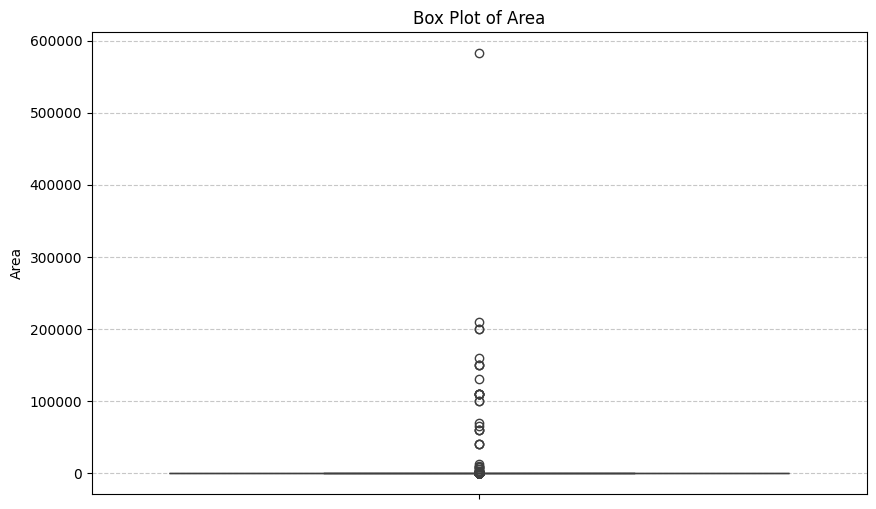

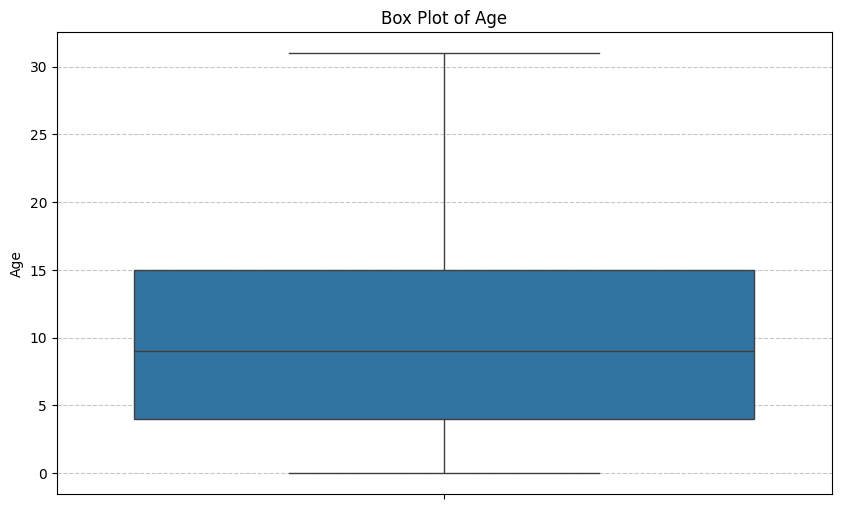

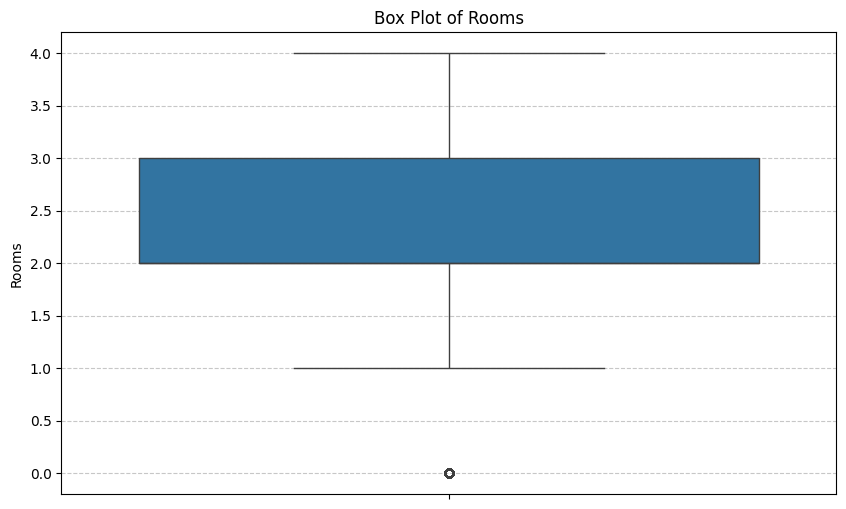

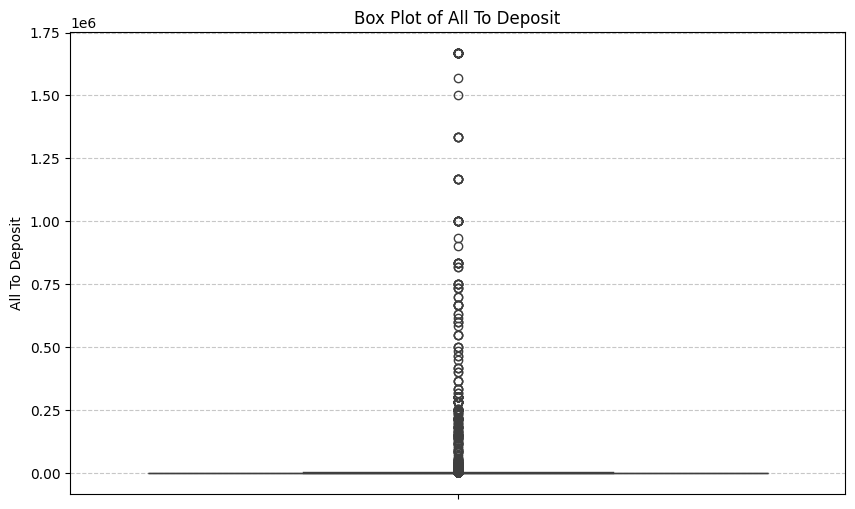

In [5]:
for feature in ['area', 'age', 'rooms', 'all_to_deposit']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dataset[feature])
    plt.title(f'Box Plot of {feature.replace("_", " ").title()}')
    plt.ylabel(feature.replace("_", " ").title())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

As we can see, there are so many outliers in the `area` and `all_to_deposit` column. We will remove them for better analysis in future.
Based on previous knowledge, we ignore the houses with area more than 500 or `all_to_deposit` more than 5000:

In [6]:
dataset_filtered = dataset[(dataset['area'] >= 20) & (dataset['area'] <= 500)]
print("Original dataset shape: ", dataset.shape)
print("Filtered dataset shape: ", dataset_filtered.shape)

Original dataset shape:  (165118, 14)
Filtered dataset shape:  (164787, 14)


In [7]:
original_rows_count = dataset_filtered.shape[0]

# Filter out rows where 'all_to_deposit' is greater than 5000
dataset_filtered = dataset_filtered[dataset_filtered['all_to_deposit'] <= 5000].copy()

removed_rows_count = original_rows_count - dataset_filtered.shape[0]

print(f"Number of rows before filtering: {original_rows_count}")
print(f"Number of rows after filtering: {dataset_filtered.shape[0]}")
print(f"Number of rows removed: {removed_rows_count}")

Number of rows before filtering: 164787
Number of rows after filtering: 161841
Number of rows removed: 2946


We also remove the redundant column:

In [8]:
dataset_filtered = dataset_filtered.drop(columns=['Unnamed: 0'])

## Relation Between Rent and Deposit

From previous knowledge, we know that rent and deposit have an reverse relation. Let's investigate it:

In [9]:
division_result = (dataset_filtered['all_to_deposit'] - dataset_filtered['deposit']) / dataset_filtered['rent']
print(division_result.mean(), division_result.std())

33.21151880914089 0.5130330384760264


As we can see, the ratio is roughly 33, with a small standard deviation. Let's remove some outliers based on this. We keep the 95% confident interval of these ratios only, getting rid of the rows that have unusuall relation between rent and deposit:

In [10]:
division_result.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate the 95% confidence interval for the non-NaN ratios
valid_ratios = division_result.dropna()

# Check if valid_ratios is empty to avoid error when calculating percentiles
if not valid_ratios.empty:
    lower_bound = np.percentile(valid_ratios, 2.5)
    upper_bound = np.percentile(valid_ratios, 97.5)
else:
    # If all ratios are NaN, set bounds to effectively include all numerical values if any existed,
    # but primarily rely on the NaN condition to keep rows.
    lower_bound = -np.inf
    upper_bound = np.inf

# Create a boolean mask for filtering
# Condition 1: Ratio is within the 95% CI
condition_ci = (division_result >= lower_bound) & (division_result <= upper_bound)

# Condition 2: Ratio is NaN (due to rent being zero), which should be kept
condition_nan = division_result.isna()

# Combine conditions: keep if within CI OR if NaN
final_mask = condition_ci | condition_nan

# Apply the filter to dataset_filtered
original_rows = dataset_filtered.shape[0]
dataset_filtered = dataset_filtered[final_mask].copy() # Use .copy() to avoid SettingWithCopyWarning
filtered_rows = dataset_filtered.shape[0]

print(f"Number of rows before filtering by 95% CI: {original_rows}")
print(f"Number of rows after filtering by 95% CI (keeping NaNs): {filtered_rows}")
print(f"Number of rows removed: {original_rows - filtered_rows}")

# Add the ratio as a new column to the *filtered* dataset
# Ensure the ratio Series aligns with the filtered DataFrame by applying the same mask
dataset_filtered['ratio'] = division_result[final_mask]

# Calculate the mean of the non-NaN 'ratio' values
mean_ratio = dataset_filtered['ratio'].mean()

# Fill NaN values in the 'ratio' column with the calculated mean
dataset_filtered['ratio'].fillna(mean_ratio, inplace=True)


Number of rows before filtering by 95% CI: 161841
Number of rows after filtering by 95% CI (keeping NaNs): 159076
Number of rows removed: 2765


## Fixing Data Types

We will fix the `time` column by converting the values into datetime format:

In [11]:
dataset_filtered['time'] = pd.to_datetime(dataset_filtered['time'], unit='s')
print(dataset_filtered['time'].head())

0   2022-07-16 08:35:40.164465408
2   2022-07-16 08:36:43.227201792
3   2022-07-16 08:36:44.710336000
4   2022-07-16 08:36:45.511114240
5   2022-07-16 08:36:47.967157760
Name: time, dtype: datetime64[ns]


## Filling the Missing Values

In [12]:
print("Missing values per column:")
missing_values = dataset_filtered.isnull().sum()
print(missing_values)

print("\nPercentage of missing values per column:")
missing_percentage = (dataset_filtered.isnull().sum() / len(dataset_filtered)) * 100
print(missing_percentage)

print(f"\nTotal number of duplicate rows before removal: {dataset_filtered.duplicated().sum()}")

dataset_filtered.drop_duplicates(inplace=True)
dataset_filtered.reset_index(drop=True, inplace=True)

print(f"Total number of duplicate rows after removal: {dataset_filtered.duplicated().sum()}")
print(f"Dataset shape after removing duplicates: {dataset_filtered.shape}")

Missing values per column:
deposit           0
rent              0
floor             0
area              0
age               0
rooms             0
elavator          0
parking           0
Warehouse         0
time              0
region            0
all_to_deposit    0
district          0
ratio             0
dtype: int64

Percentage of missing values per column:
deposit           0.0
rent              0.0
floor             0.0
area              0.0
age               0.0
rooms             0.0
elavator          0.0
parking           0.0
Warehouse         0.0
time              0.0
region            0.0
all_to_deposit    0.0
district          0.0
ratio             0.0
dtype: float64

Total number of duplicate rows before removal: 0
Total number of duplicate rows after removal: 0
Dataset shape after removing duplicates: (159076, 14)


Based on the output, there are no missing values in any of the columns. Therefore, no specific strategy for handling missing values (like imputation or removal) is needed at this stage.

## Preprocessing the Dataset

We will convert categorical features into numeric type, saving the result in a seperate dataset:

In [13]:
print("Data types of columns before conversion:")
print(dataset_filtered.dtypes)

Data types of columns before conversion:
deposit                  float64
rent                     float64
floor                    float64
area                       int64
age                        int64
rooms                      int64
elavator                   int64
parking                    int64
Warehouse                  int64
time              datetime64[ns]
region                    object
all_to_deposit           float64
district                   int64
ratio                    float64
dtype: object


In [14]:
dataset_normalized = dataset_filtered.copy()


categorical_cols = dataset_normalized.select_dtypes(include='object').columns

dataset_normalized = pd.get_dummies(dataset_normalized, columns=categorical_cols, drop_first=False)

print("First 5 rows of dataset_normalized with categorical features converted using one-hot encoding:")
display(dataset_normalized.head())
print("\nInfo of dataset_normalized after conversion:")
dataset_normalized.info()

First 5 rows of dataset_normalized with categorical features converted using one-hot encoding:


,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,...,region_کوی هفدهم شهریور,region_گاندی,region_گرگان,region_گلاب دره,region_گلچین,region_گمرک,region_گیشا (کوی نصر),region_یاخچی‌آباد,region_یافت‌آباد,region_یوسف‌آباد
0,320.0,0.0,1.0,55,7,1,1,1,0,2022-07-16 08:35:40.164465408,...,False,False,False,False,False,False,False,False,False,False
1,300.0,30.0,2.0,128,9,3,1,1,1,2022-07-16 08:36:43.227201792,...,False,False,False,False,False,False,False,False,False,False
2,600.0,18.0,8.0,132,16,2,1,1,1,2022-07-16 08:36:44.710336000,...,False,False,False,False,False,False,False,False,False,False
3,200.0,11.0,2.0,105,7,2,1,1,1,2022-07-16 08:36:45.511114240,...,False,False,False,False,False,False,False,False,False,False
4,900.0,0.0,2.0,120,1,2,1,1,1,2022-07-16 08:36:47.967157760,...,False,False,False,False,False,False,False,False,False,False



Info of dataset_normalized after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159076 entries, 0 to 159075
Columns: 356 entries, deposit to region_یوسف‌آباد
dtypes: bool(343), datetime64[ns](1), float64(5), int64(7)
memory usage: 67.8 MB


## Normalization and Standardization

We use Min-Max Normalization for some of the columns. Later in PCA analysis, we will also use standardization.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_transform = ['deposit','rent','floor', 'area', 'age', 'rooms', 'all_to_deposit', 'district']

# Initialize Min-Max scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max Normalization, replacing the original columns
for col in columns_to_transform:
    dataset_normalized[col] = min_max_scaler.fit_transform(dataset_normalized[[col]])

print("First 5 rows of dataset_normalized with columns replaced by Min-Max normalized values:")
display(dataset_normalized[columns_to_transform].head())
print("\nInfo of dataset_normalized after Min-Max normalization:")
dataset_normalized.info()

First 5 rows of dataset_normalized with columns replaced by Min-Max normalized values:


,floor,area,age,rooms,all_to_deposit,district
0,0.064516,0.072917,0.225806,0.25,0.063813,0.380952
1,0.096774,0.225000,0.290323,0.75,0.259852,0.000000
2,0.290323,0.233333,0.516129,0.50,0.239848,0.000000
3,0.096774,0.177083,0.225806,0.50,0.113023,0.190476
4,0.096774,0.208333,0.032258,0.50,0.179836,0.142857



Info of dataset_normalized after Min-Max normalization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159076 entries, 0 to 159075
Columns: 356 entries, deposit to region_یوسف‌آباد
dtypes: bool(343), datetime64[ns](1), float64(9), int64(3)
memory usage: 67.8 MB


## Final Report

*   **Data Cleaning:** The initial dataset had **no missing values** across any columns and **no duplicate rows** found. Consequently, no rows were removed during the cleaning process. One redundant column was removed, and outliers for features `area` and `all_to_deposit` were removed.

*   **Feature Preprocessing:** The categorical `region` column was successfully converted into numerical format using one-hot encoding, resulting in multiple new boolean columns (e.g., `region_Tehran`). This step ensured all features became numerical, suitable for subsequent analysis. Also, `time` column is converted to datetime format for better analysis.

*   **Feature Scaling:** Eight specific numerical columns (`deposit`, `rent`, `floor`, `area`, `age`, `rooms`, `all_to_deposit`, `district`) were normalized using Min-Max normalization.


# Data Visualization

Let's First draw Pie Charts and Box plots to better understand the distribution of each feature:

Generating Pie Charts for Categorical Features...


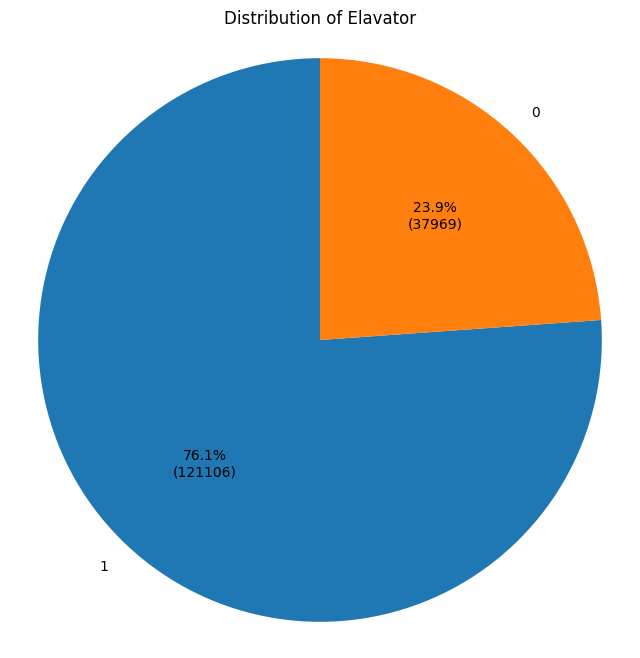

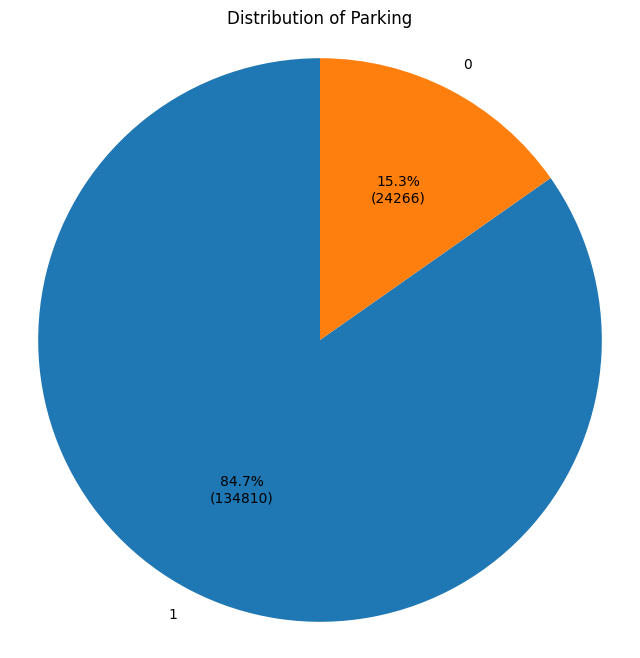

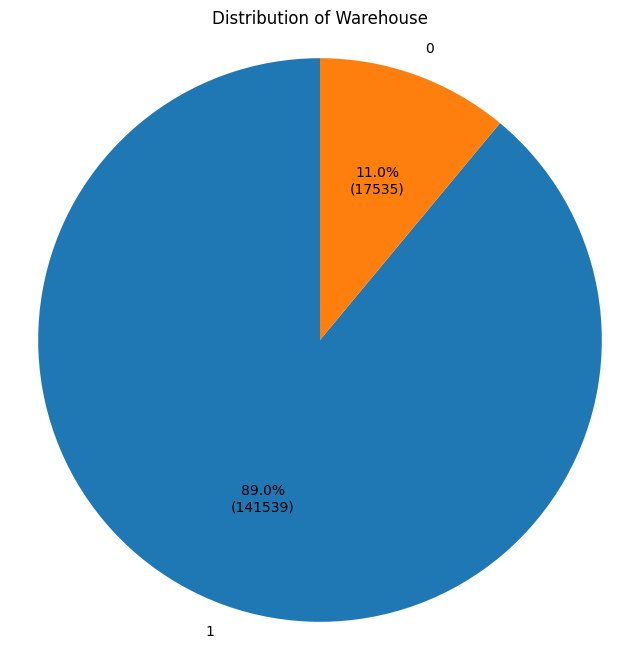

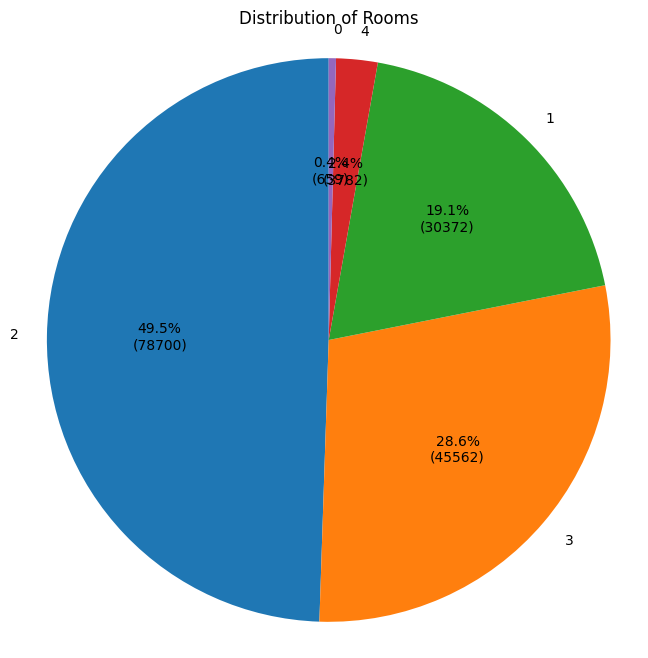

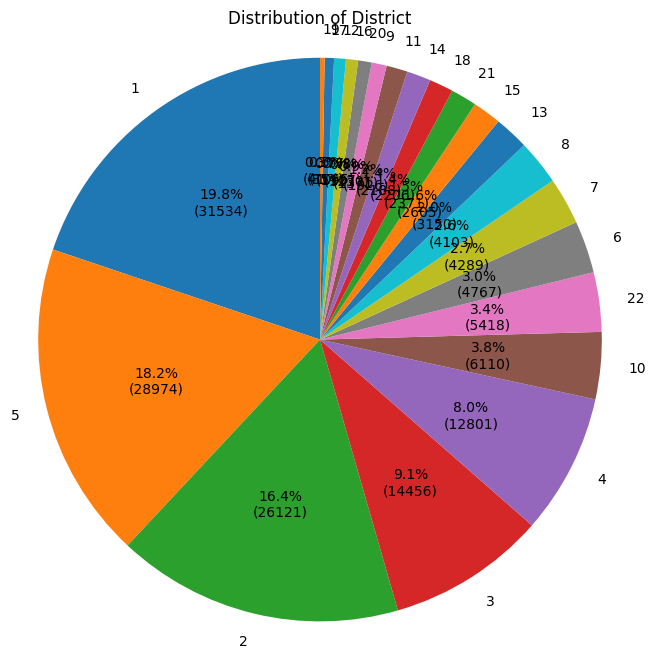

In [16]:
categorical_features = ['elavator', 'parking', 'Warehouse', 'rooms', 'district']

print("Generating Pie Charts for Categorical Features...")
for feature in categorical_features:
    plt.figure(figsize=(8, 8))
    counts = dataset_filtered[feature].value_counts()
    labels = counts.index.map(str)
    sizes = counts.values
    
    # Calculate percentage for each slice
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return f"{pct:.1f}%\n({absolute:d})"

    plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=90)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()



Generating Box Plots for Numerical Features...


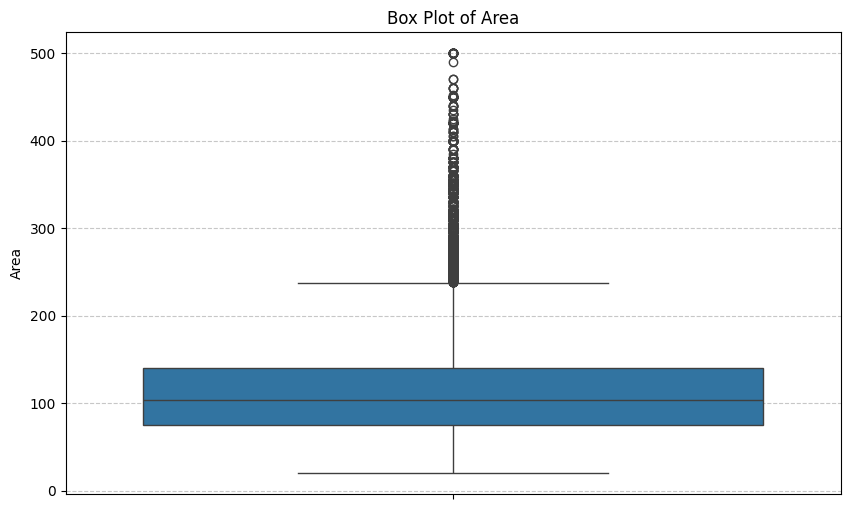

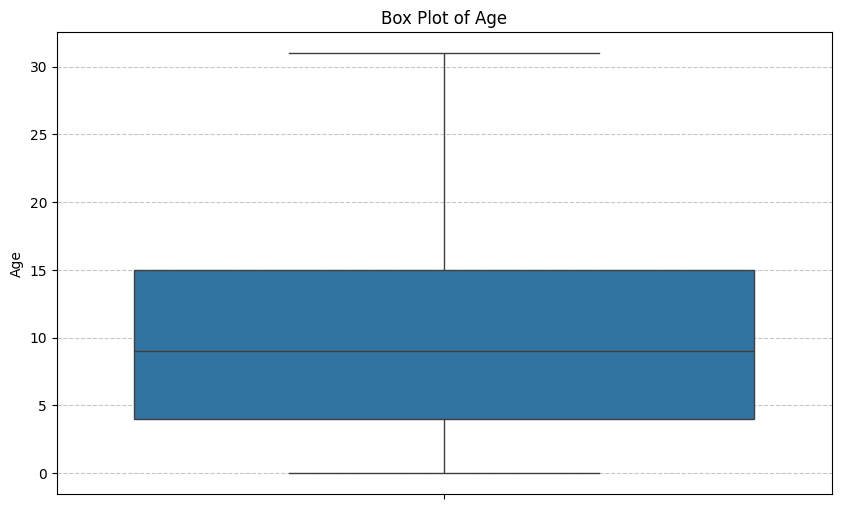

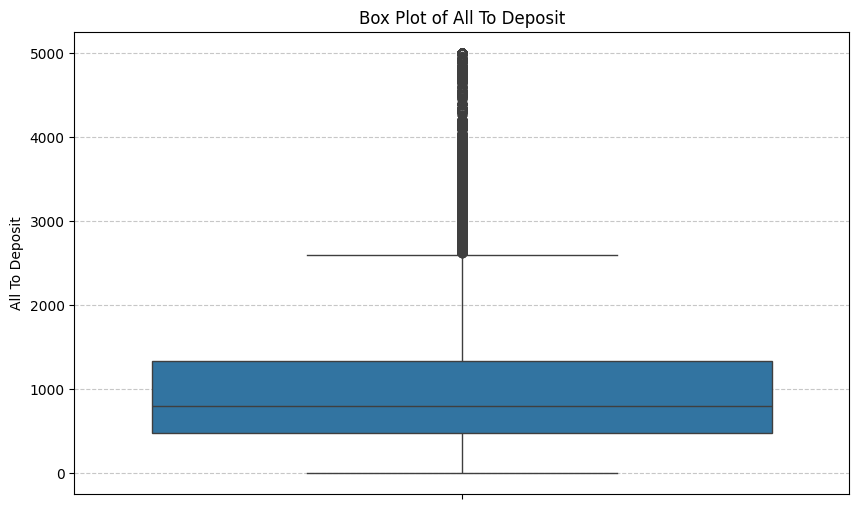

In [17]:
# Numerical features for box plots
numerical_features = ['area', 'age', 'all_to_deposit']

print("\nGenerating Box Plots for Numerical Features...")
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dataset_filtered[feature])
    plt.title(f'Box Plot of {feature.replace("_", " ").title()}')
    plt.ylabel(feature.replace("_", " ").title())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Let's Investigate the relation between `all_to_deposit` (which essentially represents the price of the house) with `district`. This will give a basic insight on how expensive each district is:

C:\Users\it\AppData\Local\Temp\ipykernel_18804\2098704454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_deposit_by_district.index, y=average_deposit_by_district.values, palette='viridis')


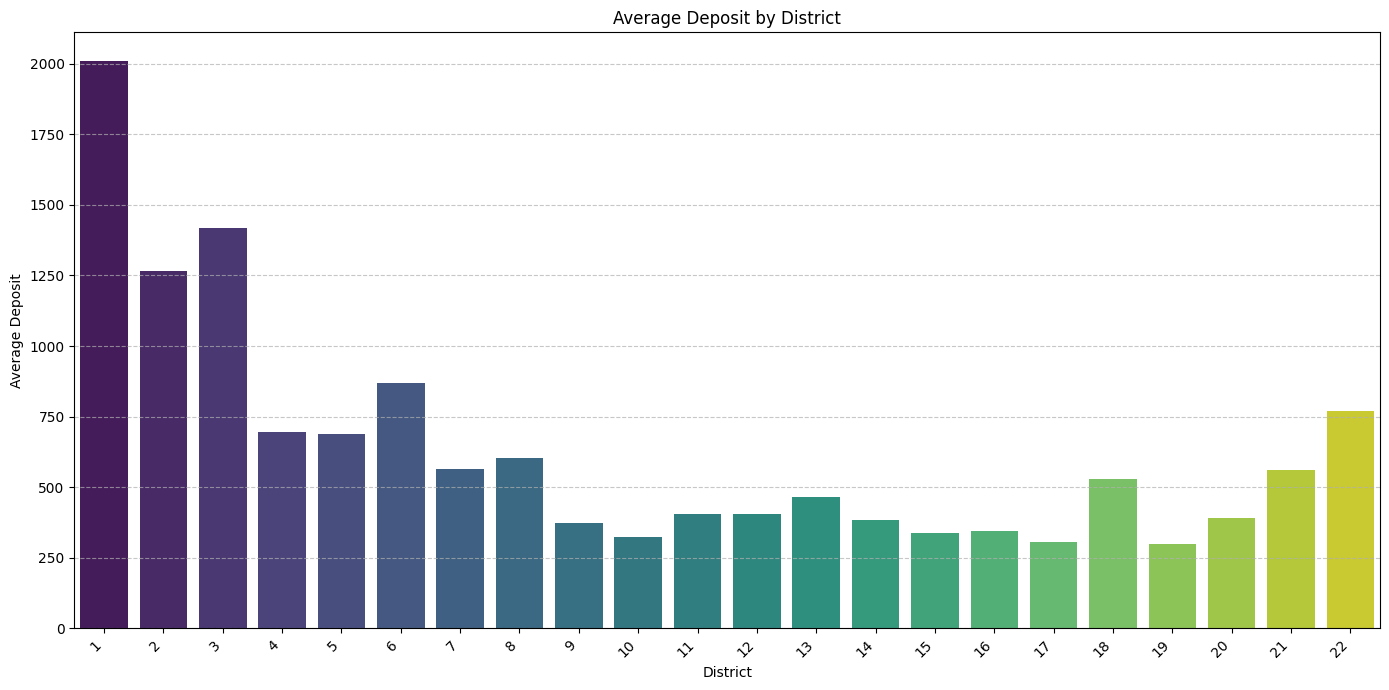

In [18]:
plt.figure(figsize=(14, 7))
# Group by 'district' and calculate the mean of 'deposit'
average_deposit_by_district = dataset_filtered.groupby('district')['all_to_deposit'].mean().sort_values(ascending=False)
sns.barplot(x=average_deposit_by_district.index, y=average_deposit_by_district.values, palette='viridis')
plt.title('Average Deposit by District')
plt.xlabel('District')
plt.ylabel('Average Deposit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Let's do the same for number of rooms. We expect higher deposit value for houses with more rooms:

C:\Users\it\AppData\Local\Temp\ipykernel_18804\300781208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rent_by_rooms.index, y=average_rent_by_rooms.values, palette='plasma')


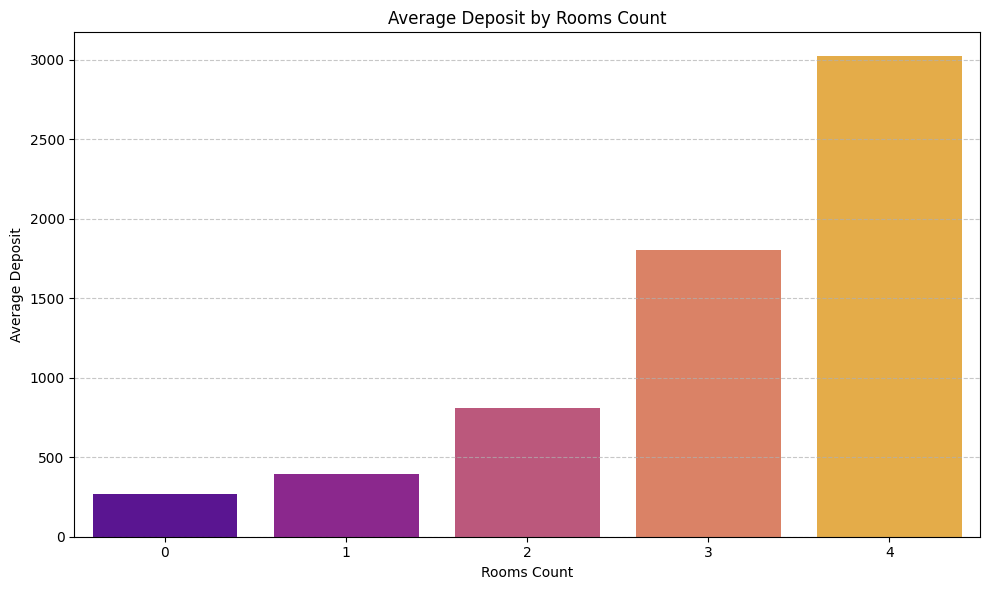

In [19]:
plt.figure(figsize=(10, 6))
# Group by 'rooms' and calculate the mean of 'rent'
average_rent_by_rooms = dataset_filtered.groupby('rooms')['all_to_deposit'].mean().sort_values(ascending=False)
sns.barplot(x=average_rent_by_rooms.index, y=average_rent_by_rooms.values, palette='plasma')
plt.title('Average Deposit by Rooms Count')
plt.xlabel('Rooms Count')
plt.ylabel('Average Deposit')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

And the same for houses with Elavator:

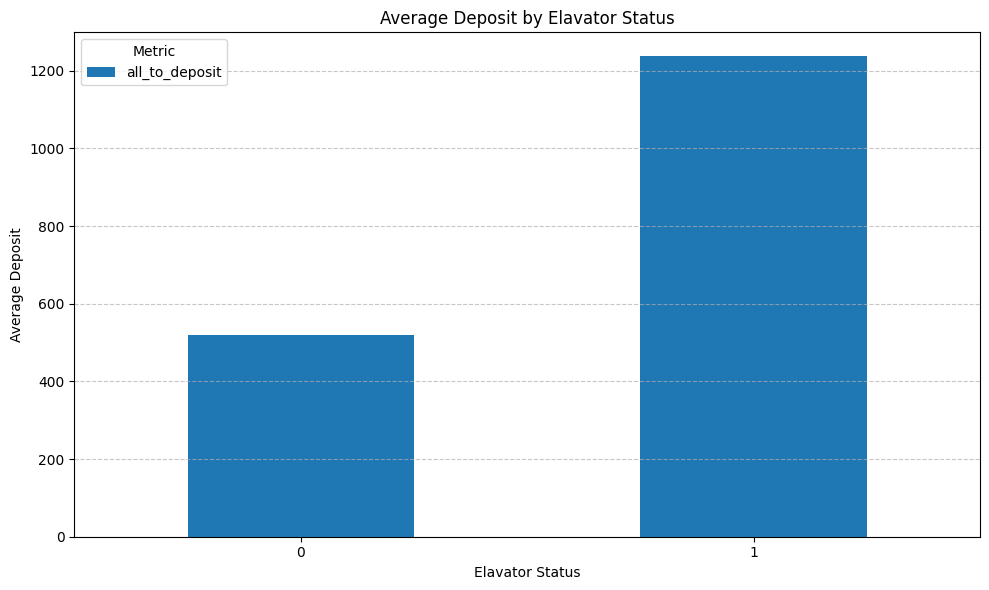

In [20]:
average_deposit_by_elavator = dataset_filtered.groupby('elavator')[['all_to_deposit']].mean()

# Plotting the grouped bar chart
average_deposit_by_elavator.plot(kind='bar', figsize=(10, 6))

plt.title('Average Deposit by Elavator Status')
plt.xlabel('Elavator Status')
plt.ylabel('Average Deposit')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Let's use a scatter plot to see the relation between area and deposit:

Generating scatter plot for 'area' vs 'deposit'...


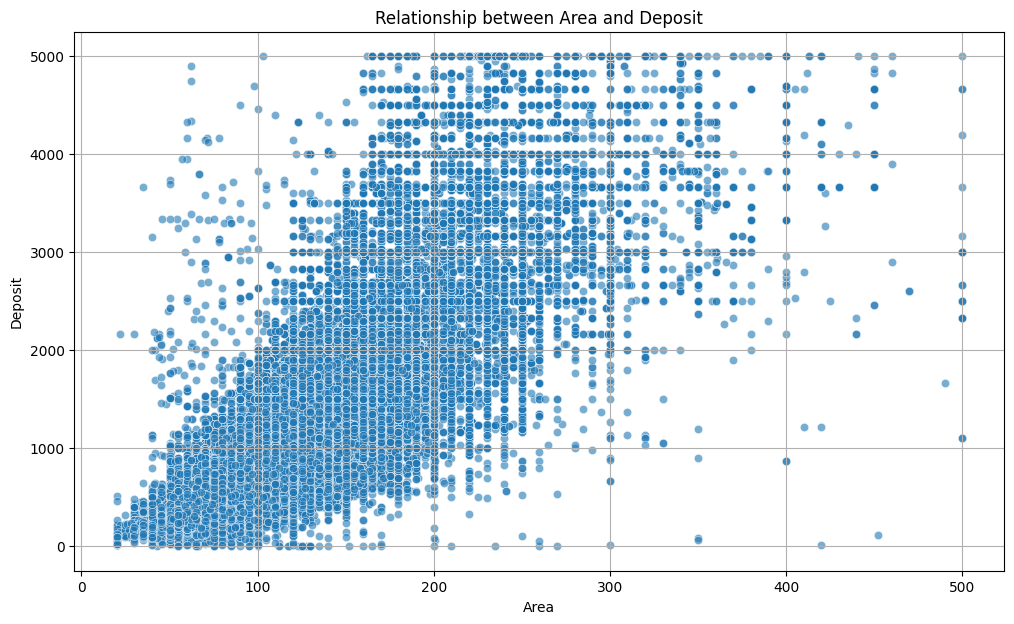

In [21]:
print("Generating scatter plot for 'area' vs 'deposit'...")
plt.figure(figsize=(12, 7))
sns.scatterplot(data=dataset_filtered, x='area', y='all_to_deposit', alpha=0.6)
plt.title('Relationship between Area and Deposit')
plt.xlabel('Area')
plt.ylabel('Deposit')
plt.grid(True)
plt.show()

As expected, we can see that 'bigger houses are more expensive'. Let's convert it to a bubble chart and also consider the age of the house:

Generating bubble chart for 'area' vs 'deposit' with 'age' as bubble size...


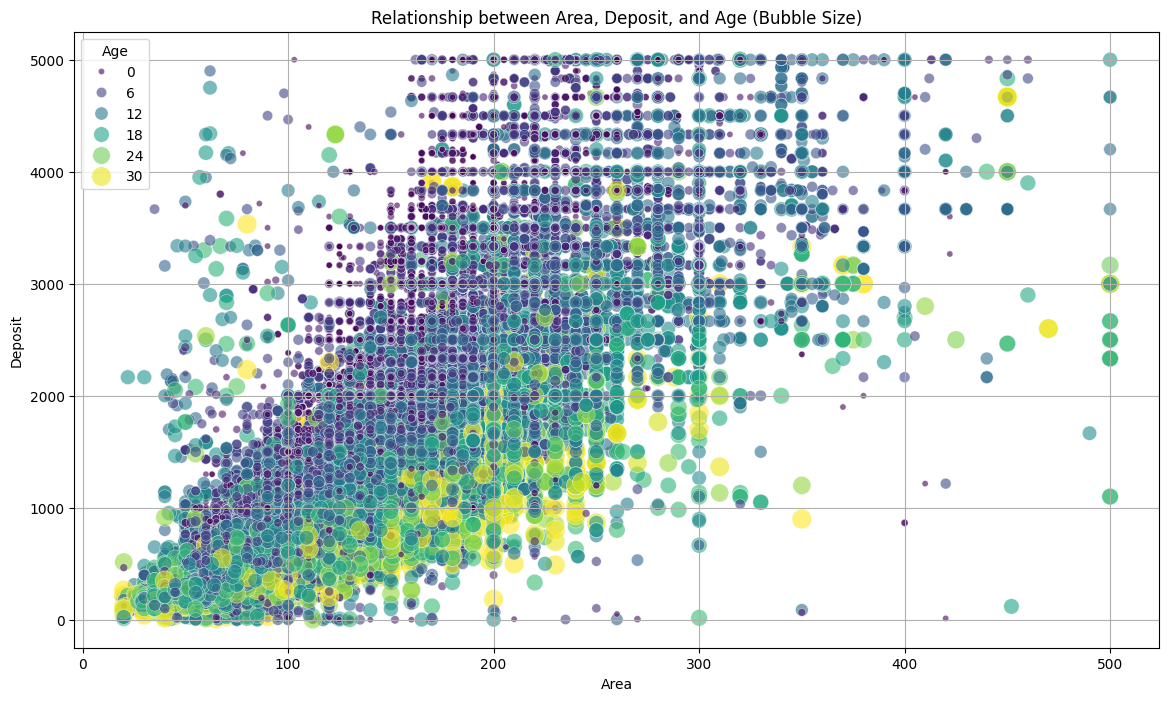

In [22]:
print("Generating bubble chart for 'area' vs 'deposit' with 'age' as bubble size...")
plt.figure(figsize=(14, 8))
sns.scatterplot(data=dataset_filtered, x='area', y='all_to_deposit', size='age', sizes=(20, 200), alpha=0.6, hue='age', palette='viridis')
plt.title('Relationship between Area, Deposit, and Age (Bubble Size)')
plt.xlabel('Area')
plt.ylabel('Deposit')
plt.grid(True)
plt.legend(title='Age')
plt.show()

Finally, let's plot our initial plot with error bars:

Generating bar plot for average deposit by district with error bars...


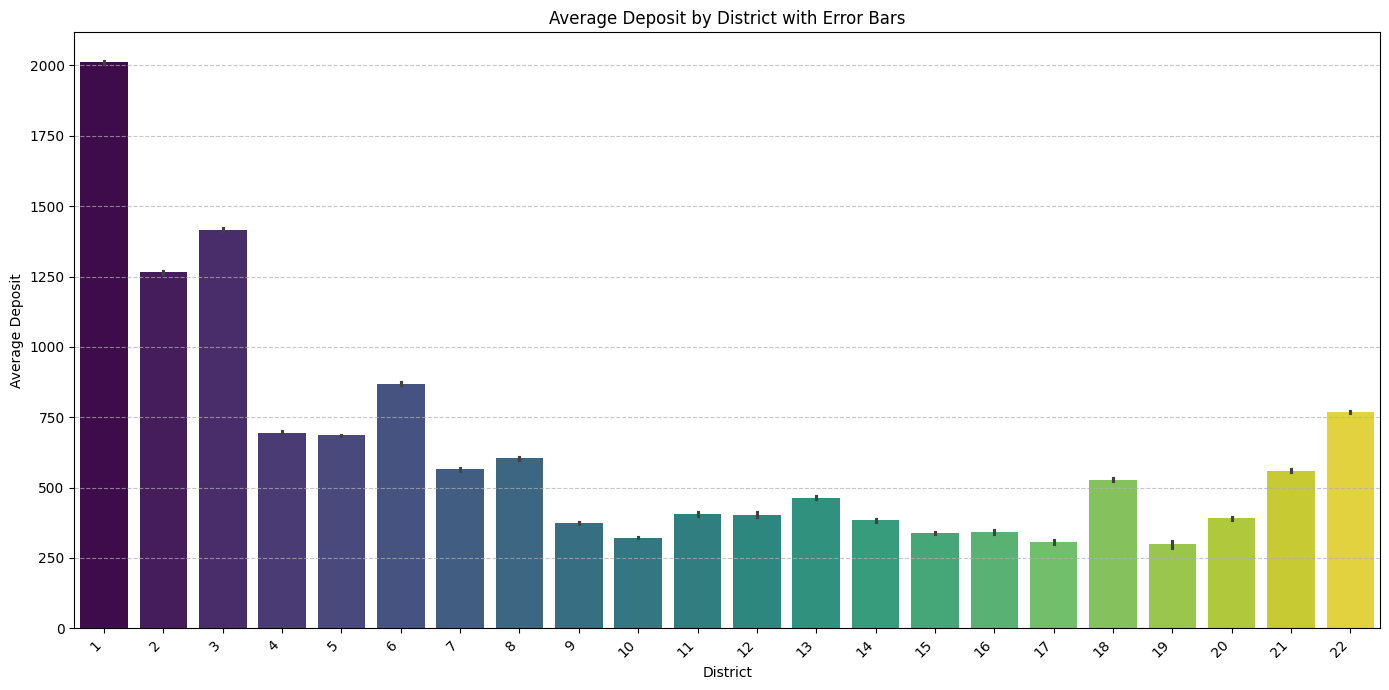

In [23]:
print("Generating bar plot for average deposit by district with error bars...")
plt.figure(figsize=(14, 7))
sns.barplot(data=dataset_filtered, x='district', y='all_to_deposit', errorbar='se', palette='viridis', hue='district', legend=False)
plt.title('Average Deposit by District with Error Bars')
plt.xlabel('District')
plt.ylabel('Average Deposit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Feature Engineering

Let's begin by plotting a correlation matrix to better see the linear relation between features:

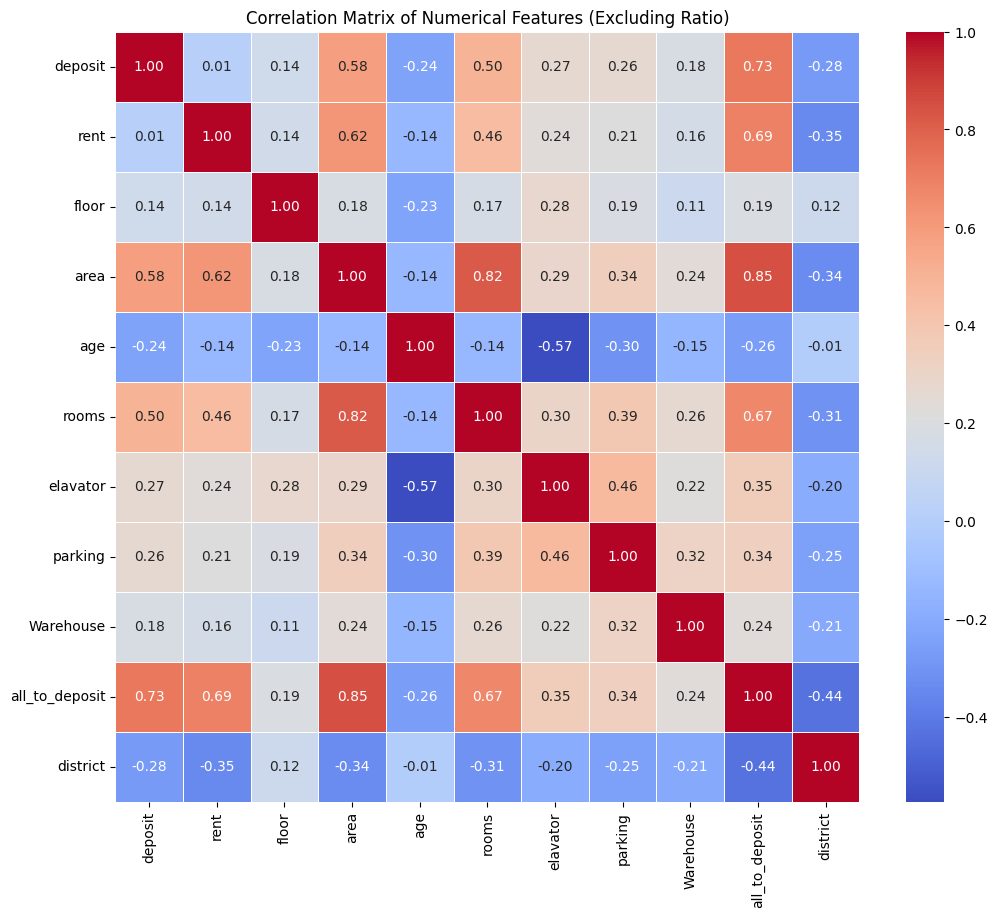

In [24]:
numerical_cols = dataset_filtered.select_dtypes(include=['float64', 'int64']).columns.drop('ratio', errors='ignore')

# Compute the correlation matrix
correlation_matrix = dataset_filtered[numerical_cols].corr()

# Draw the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (Excluding Ratio)')
plt.show()

## Adding Features `deposit_per_sqm` and `amenities_score`

We add two new features:
1. `deposit_per_sqm`: Divide `all_to_deposit` by `area`. In real estate, the price per unit of area (e.g., per square meter) is a fundamental metric. It normalizes prices across properties of different sizes, allowing for a more accurate comparison of value. This feature can help capture how valuable a property is independent of its total size.

2. `amenities_score` : Sum up boolean features `elavator`, `parking`, `Warehouse`. Instead of treating each amenity as an independent binary feature, an 'amenities score' or count can provide a composite measure of a property's convenience and luxury. This might reveal a stronger linear relationship with price than individual binary flags, especially if multiple amenities often co-occur and contribute synergistically to value.

In [25]:
dataset_filtered['deposit_per_sqm'] = dataset_filtered['all_to_deposit'] / dataset_filtered['area']

print("First 5 rows of dataset_filtered with the new 'deposit_per_sqm' feature:")
display(dataset_filtered.head())


First 5 rows of dataset_filtered with the new 'deposit_per_sqm' feature:


,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district,ratio,deposit_per_sqm
0,320.0,0.0,1.0,55,7,1,1,1,0,2022-07-16 08:35:40.164465408,استاد معین,320.0,9,33.289563,5.818182
1,300.0,30.0,2.0,128,9,3,1,1,1,2022-07-16 08:36:43.227201792,محمودیه,1300.0,1,33.333333,10.156250
2,600.0,18.0,8.0,132,16,2,1,1,1,2022-07-16 08:36:44.710336000,فرمانیه,1200.0,1,33.333333,9.090909
3,200.0,11.0,2.0,105,7,2,1,1,1,2022-07-16 08:36:45.511114240,شهران شمالی,566.0,5,33.272727,5.390476
4,900.0,0.0,2.0,120,1,2,1,1,1,2022-07-16 08:36:47.967157760,تهرانپارس شرقی,900.0,4,33.289563,7.500000


Let's check how `deposit_per_sqm` varries in districts:

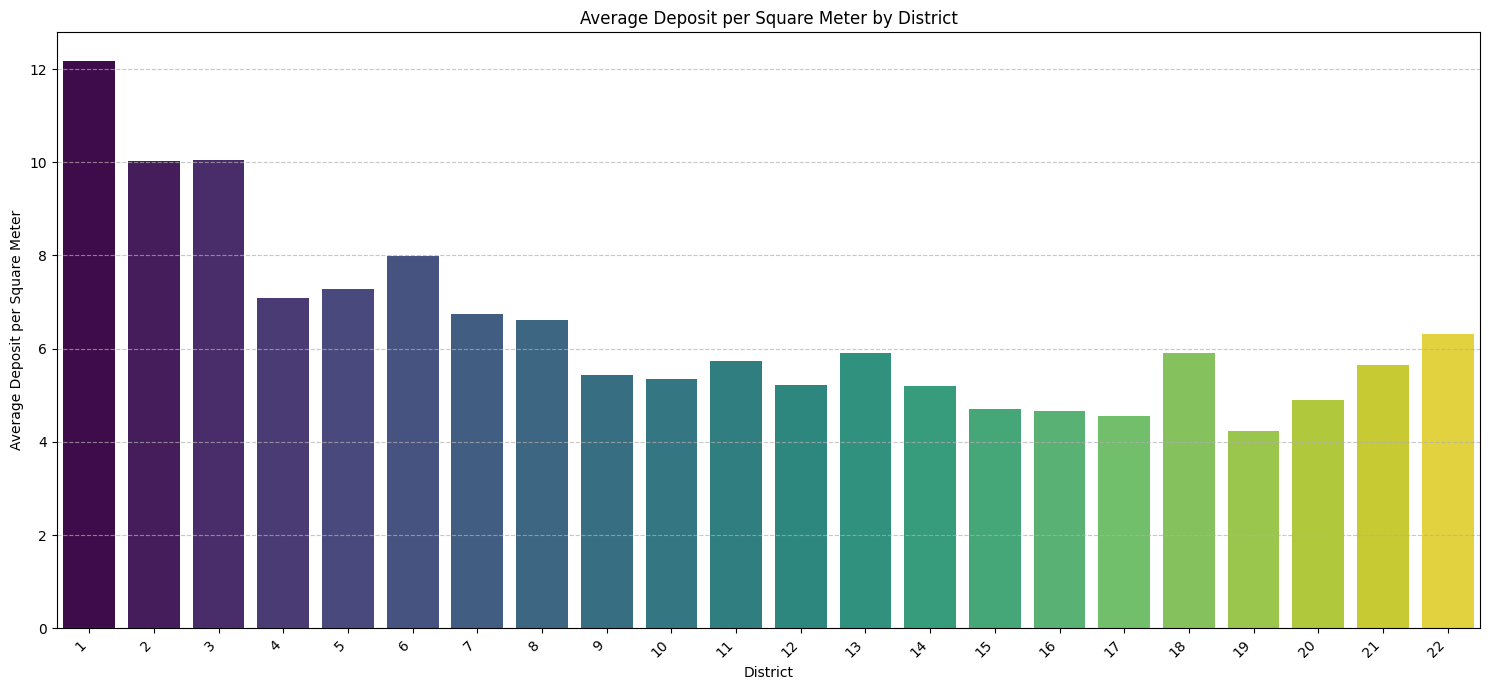

In [26]:
average_deposit_per_sqm_by_district = dataset_filtered.groupby('district')['deposit_per_sqm'].mean().reset_index()

# Sort the districts by average deposit_per_sqm for better visualization
average_deposit_per_sqm_by_district = average_deposit_per_sqm_by_district.sort_values(by='deposit_per_sqm', ascending=False)

# Create the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='district', y='deposit_per_sqm', data=average_deposit_per_sqm_by_district, hue='district', legend=False, palette='viridis')
plt.title('Average Deposit per Square Meter by District')
plt.xlabel('District')
plt.ylabel('Average Deposit per Square Meter')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
dataset_filtered['amenities_score'] = dataset_filtered['elavator'] + dataset_filtered['parking'] + dataset_filtered['Warehouse']

print("First 5 rows of dataset_filtered with the new 'amenities_score' feature:")
display(dataset_filtered.head())

First 5 rows of dataset_filtered with the new 'amenities_score' feature:


,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district,ratio,deposit_per_sqm,amenities_score
0,320.0,0.0,1.0,55,7,1,1,1,0,2022-07-16 08:35:40.164465408,استاد معین,320.0,9,33.289563,5.818182,2
1,300.0,30.0,2.0,128,9,3,1,1,1,2022-07-16 08:36:43.227201792,محمودیه,1300.0,1,33.333333,10.156250,3
2,600.0,18.0,8.0,132,16,2,1,1,1,2022-07-16 08:36:44.710336000,فرمانیه,1200.0,1,33.333333,9.090909,3
3,200.0,11.0,2.0,105,7,2,1,1,1,2022-07-16 08:36:45.511114240,شهران شمالی,566.0,5,33.272727,5.390476,3
4,900.0,0.0,2.0,120,1,2,1,1,1,2022-07-16 08:36:47.967157760,تهرانپارس شرقی,900.0,4,33.289563,7.500000,3


## Feature Selection Using Mutual Information

We use sklearn mutual_info_regression to find the most informative features. We take the target feature to be `all_to_deposit`:

Mutual Information Scores (Top 5):

area               0.914546
district           0.486624
rooms              0.439918
amenities_score    0.255025
parking            0.166860
Name: Mutual Information Scores, dtype: float64


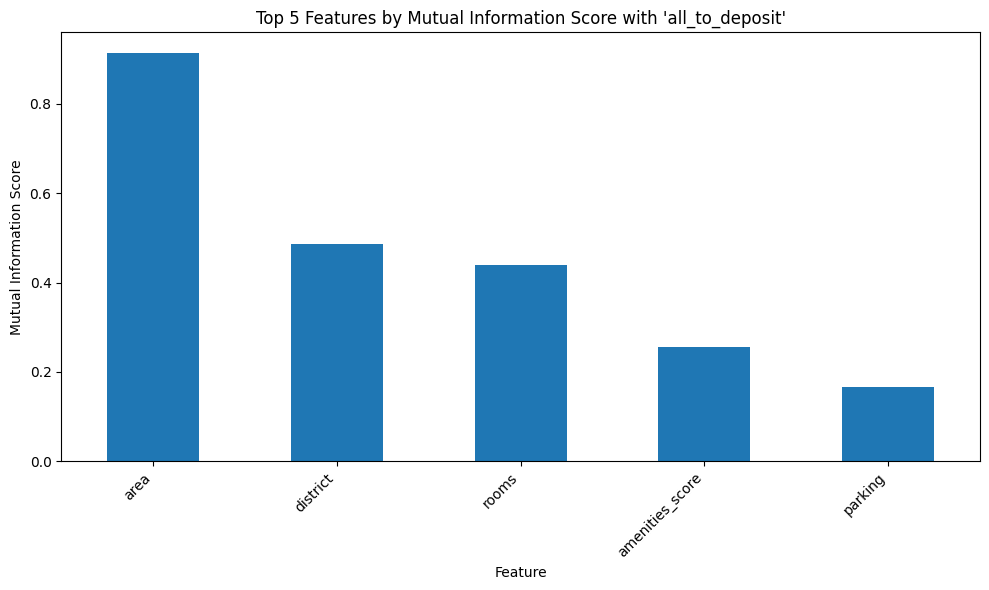

In [28]:
from sklearn.feature_selection import mutual_info_regression


df_mi = dataset_filtered.copy()

target_column = 'all_to_deposit'
y = df_mi[target_column]

# Prepare features (X) - selecting only numerical features and dropping specified ones
# Identify all numerical columns in df_mi
numeric_cols = df_mi.select_dtypes(include=['number']).columns.tolist()

# Define columns to exclude from the feature set X (target itself, derived features, or features to ignore)
columns_to_exclude = [target_column, 'ratio', 'deposit_per_sqm', 'deposit', 'rent']

# Filter numeric_cols to remove the ones we want to exclude
features_for_mi = [col for col in numeric_cols if col not in columns_to_exclude]

X = df_mi[features_for_mi]

# Identify discrete features for mutual_info_regression from the selected X
# These are typically count-based or integer-represented categories
discrete_numerical_cols = ['floor', 'age', 'rooms', 'elavator', 'parking', 'Warehouse', 'district', 'amenities_score']

# Create a boolean mask for discrete features that are present in X
discrete_features_mask = X.columns.isin(discrete_numerical_cols)

# Calculate Mutual Information scores
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features_mask, random_state=42)
mi_scores = pd.Series(mi_scores, name="Mutual Information Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("Mutual Information Scores (Top 5):\n")
print(mi_scores.head(5))

# Visualize the top 5 scores
plt.figure(figsize=(10, 6))
mi_scores.head(5).plot.bar()
plt.title("Top 5 Features by Mutual Information Score with 'all_to_deposit'")
plt.ylabel("Mutual Information Score")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Dimensionality Reduction Using PCA

First, we standardize numeric feature to perform PCA:

In [30]:
from sklearn.preprocessing import StandardScaler

# 1. Define a list of numerical features to be used for PCA
numerical_features_for_pca = ['floor', 'area', 'age', 'rooms', 'elavator', 'parking', 'Warehouse', 'district', 'amenities_score','deposit_per_sqm']

# 2. Select these features from the dataset_filtered DataFrame
features_for_pca = dataset_filtered[numerical_features_for_pca].copy()

# 3. Instantiate a StandardScaler object
scaler = StandardScaler()

# 4. Apply the fit_transform method to scale the data
scaled_features = scaler.fit_transform(features_for_pca)

# Convert the scaled features back to a DataFrame for easier handling, if needed
# For now, it's a numpy array, which is fine for PCA input

print("First 5 rows of features selected for PCA:")
display(features_for_pca.head())

print("\nShape of features selected for PCA:", features_for_pca.shape)
print("\nFirst 5 rows of scaled features (numpy array):")
print(scaled_features[:5])
print("\nShape of scaled features:", scaled_features.shape)


First 5 rows of features selected for PCA:


,floor,area,age,rooms,elavator,parking,Warehouse,district,amenities_score,deposit_per_sqm
0,1.0,55,7,1,1,1,0,9,2,5.818182
1,2.0,128,9,3,1,1,1,1,3,10.156250
2,8.0,132,16,2,1,1,1,1,3,9.090909
3,2.0,105,7,2,1,1,1,5,3,5.390476
4,2.0,120,1,2,1,1,1,4,3,7.500000



Shape of features selected for PCA: (159076, 10)

First 5 rows of scaled features (numpy array):
[[-0.85546762 -1.09759977 -0.42355553 -1.50187852  0.55992513  0.42426582
  -2.84102024  0.59570101 -0.6043981  -0.74018672]
 [-0.45483417  0.2699303  -0.135816    1.14514972  0.55992513  0.42426582
   0.35198623 -0.84730881  0.60794957  0.42684543]
 [ 1.94896657  0.34486346  0.87127235 -0.1783644   0.55992513  0.42426582
   0.35198623 -0.84730881  0.60794957  0.14024618]
 [-0.45483417 -0.16093534 -0.42355553 -0.1783644   0.55992513  0.42426582
   0.35198623 -0.1258039   0.60794957 -0.85524859]
 [-0.45483417  0.12006399 -1.28677411 -0.1783644   0.55992513  0.42426582
   0.35198623 -0.30618013  0.60794957 -0.28774204]]

Shape of scaled features: (159076, 10)


Now that the numerical features are scaled, we will apply PCA to these features, retaining components that explain at least 95% of the variance. Then we will store the principal components in a new DataFrame named dataset_pca and display relevant information about the PCA.

In [31]:
from sklearn.decomposition import PCA
import pandas as pd

# 5. Instantiate a PCA object, retaining enough components to explain at least 95% of the variance
pca = PCA(n_components=0.95)

# 6. Apply PCA to the scaled features
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the principal components
# The number of components will be determined by PCA based on the 0.95 variance threshold
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
dataset_pca = pd.DataFrame(data=principal_components, columns=pca_columns, index=dataset_filtered.index)

# Print the shape of dataset_pca
print(f"Shape of dataset_pca: {dataset_pca.shape}")

# Print the explained variance ratio for each component
print("\nExplained variance ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

# Print the cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(f"\nCumulative explained variance: {cumulative_variance[-1]:.4f}")

print("\nFirst 5 rows of dataset_pca:")
display(dataset_pca.head())

Shape of dataset_pca: (159076, 8)

Explained variance ratio for each component:
PC1: 0.4146
PC2: 0.1516
PC3: 0.1078
PC4: 0.0953
PC5: 0.0718
PC6: 0.0628
PC7: 0.0442
PC8: 0.0349

Cumulative explained variance: 0.9830

First 5 rows of dataset_pca:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.920374,-1.411710,-0.226893,1.999273,-1.479139,1.471897,-0.042967,0.061871
1,1.478383,0.719263,-0.424060,0.100798,-0.378357,-0.049282,-0.308434,-0.092777
2,1.103372,-0.098345,0.508584,-0.586933,1.559525,1.215530,-0.749706,0.061406
3,0.385477,-0.637596,-0.720043,-0.375497,-0.701801,0.024580,-0.514225,-0.424535
4,0.930307,-0.727579,-0.684014,0.253614,-0.608828,-0.437363,-0.111214,-0.689307


## When is feature engineering a nice-to-have option, and when is it a must-have?

Feature engineering is a critical step in machine learning that can significantly impact model performance. Here's a breakdown of when it's a 'nice-to-have' versus a 'must-have':

### When Feature Engineering is a 'Nice-to-Have' (Can Improve Performance)

*   **Good Baseline Performance:** When your initial model (e.g., using raw features or simple encoding) already achieves acceptable or good performance. In such cases, feature engineering can push performance from good to great, offering marginal but meaningful improvements.
*   **Robust Algorithms:** Some algorithms, particularly those that are less sensitive to feature scaling or non-linear relationships (like tree-based models such as Random Forests or Gradient Boosting Machines), can perform reasonably well even with raw or minimally processed features. Feature engineering here can still provide an uplift but might not be strictly necessary for a functional model.
*   **Large Datasets:** With very large datasets, models might be able to learn complex patterns and interactions even from raw features, reducing the absolute *necessity* of hand-crafted features. However, well-engineered features can still lead to faster convergence or better generalization.
*   **Domain Expertise is Limited/Expensive:** If domain expertise is scarce or too costly to apply, you might start with automated feature engineering techniques or rely on models that can implicitly learn features, making manual feature engineering a 'nice-to-have' if resources permit.

### When Feature Engineering is a 'Must-Have' (Essential for Model Success)

*   **Poor Baseline Performance:** If your initial model performs poorly or fails to converge, it's a strong indicator that the raw features aren't effectively capturing the underlying patterns. Feature engineering becomes essential to transform the data into a more machine-readable and informative format.
*   **Algorithms Sensitive to Feature Representation:** Linear models (e.g., Linear Regression, Logistic Regression, SVMs with linear kernels) often struggle with non-linear relationships, categorical data not properly encoded, or features on vastly different scales. For these models, creating interaction terms, polynomial features, or scaling is crucial.
*   **Handling Missing or Noisy Data:** Imputation strategies, outlier detection, and noise reduction techniques are forms of feature engineering that are often 'must-haves' to make the dataset usable and prevent model collapse or misleading results.
*   **Capturing Domain-Specific Insights:** When there's strong domain knowledge that suggests certain relationships or combinations of features are important (e.g., 'age of property' and 'number of rooms' might interact to determine family-friendliness), explicitly creating these features can provide a significant boost. This is particularly true in areas like finance, healthcare, or real estate (as seen in our Colab with `deposit_per_sqm` or `amenities_score`).
*   **Reducing Dimensionality/Complexity:** When dealing with high-dimensional data, creating aggregate or composite features (like the `amenities_score` or PCA components we created) can be a 'must-have' to mitigate the curse of dimensionality, improve computational efficiency, and prevent overfitting.
*   **Time-Series Data:** For time-series problems, extracting features like lagged values, rolling averages, seasonality indicators (e.g., `month`, `day_of_week`), or trends is almost always a 'must-have' to capture the temporal dependencies.
*   **Categorical Data with High Cardinality:** Transforming high-cardinality categorical features (like `region` in our dataset) using techniques like target encoding, one-hot encoding, or grouping is often essential, as simply dropping them would lose valuable information, and raw handling by some models can be inefficient.

In essence, while advanced models can learn some feature transformations implicitly, human-driven feature engineering often provides a more direct and efficient way to encode domain knowledge and prepare data in a way that allows simpler models to perform well, and complex models to perform even better.